In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
import shap

In [33]:
credit_card_data=pd.read_csv('creditcard.csv')
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
credit_card_data.shape

(283726, 31)

In [39]:
credit_card_data=credit_card_data.drop_duplicates()

In [41]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [43]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [45]:
credit_card_data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

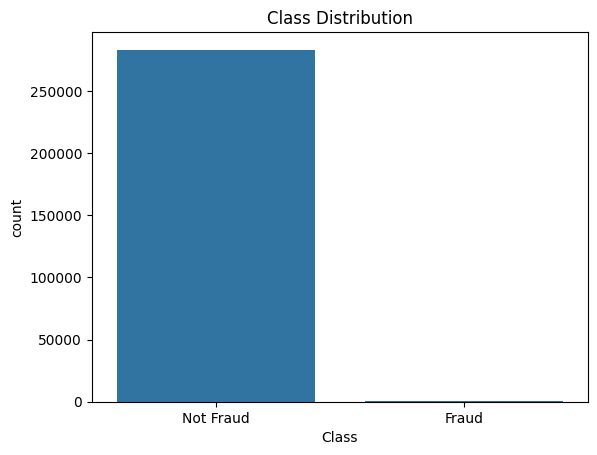

In [47]:
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

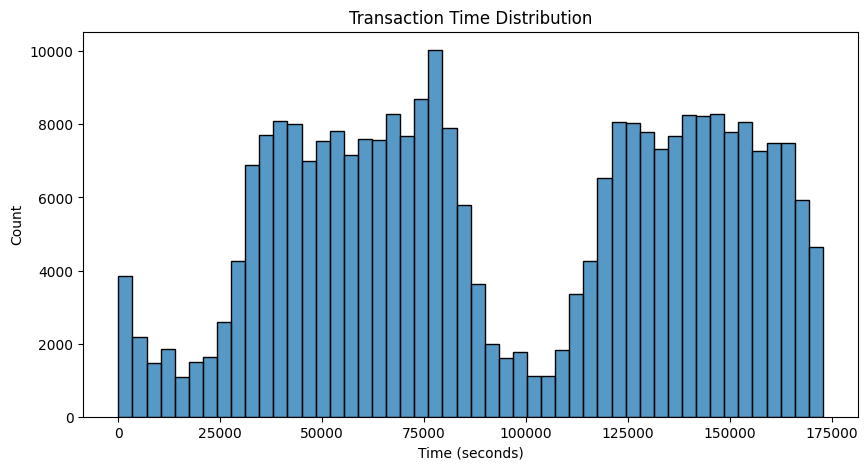

In [81]:
plt.figure(figsize=(10, 5))
sns.histplot(credit_card_data['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.show()

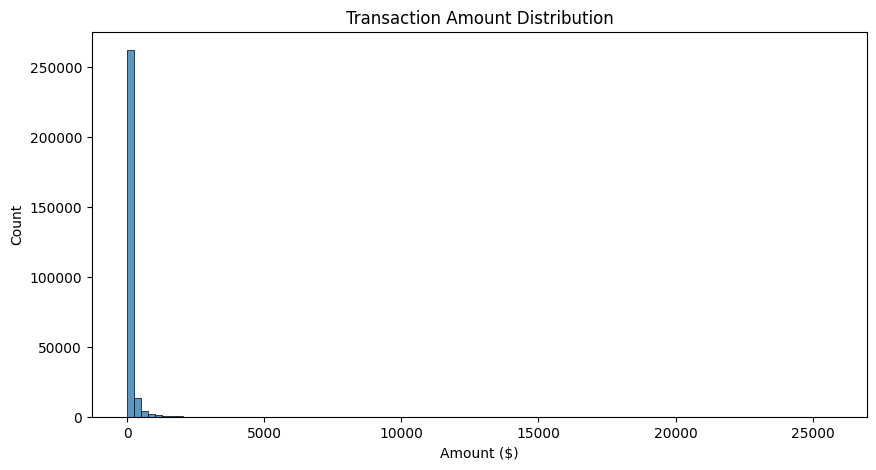

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(credit_card_data['Amount'], bins=100)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.show()

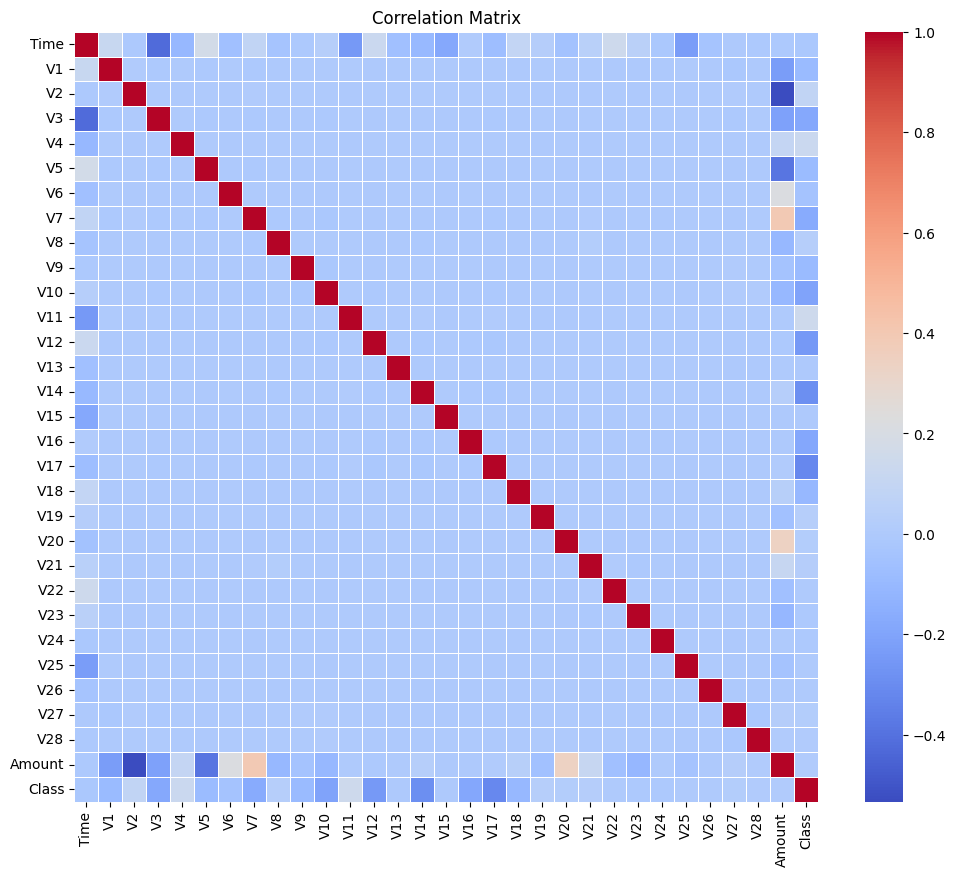

In [53]:
plt.figure(figsize=(12, 10))
corr = credit_card_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [55]:
X= credit_card_data.drop("Class",axis=1)
y= credit_card_data["Class"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [57]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [59]:
print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {y_train_res.value_counts()}")

Before SMOTE: Class
0    226602
1       378
Name: count, dtype: int64
After SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


In [61]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_res, y_train_res)

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:54:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [65]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56636    15]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.80      0.82        95

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



ROC-AUC Score: 0.97


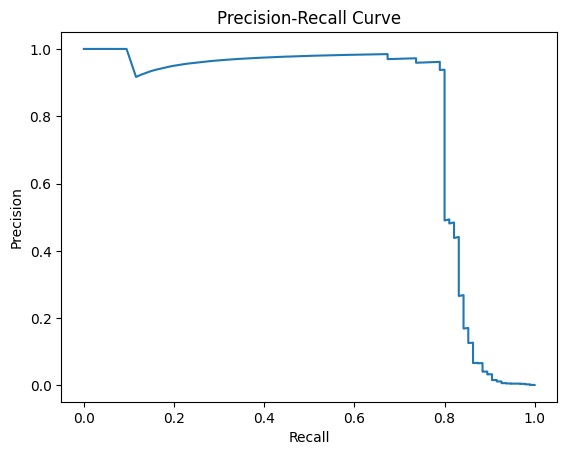

In [67]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [69]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

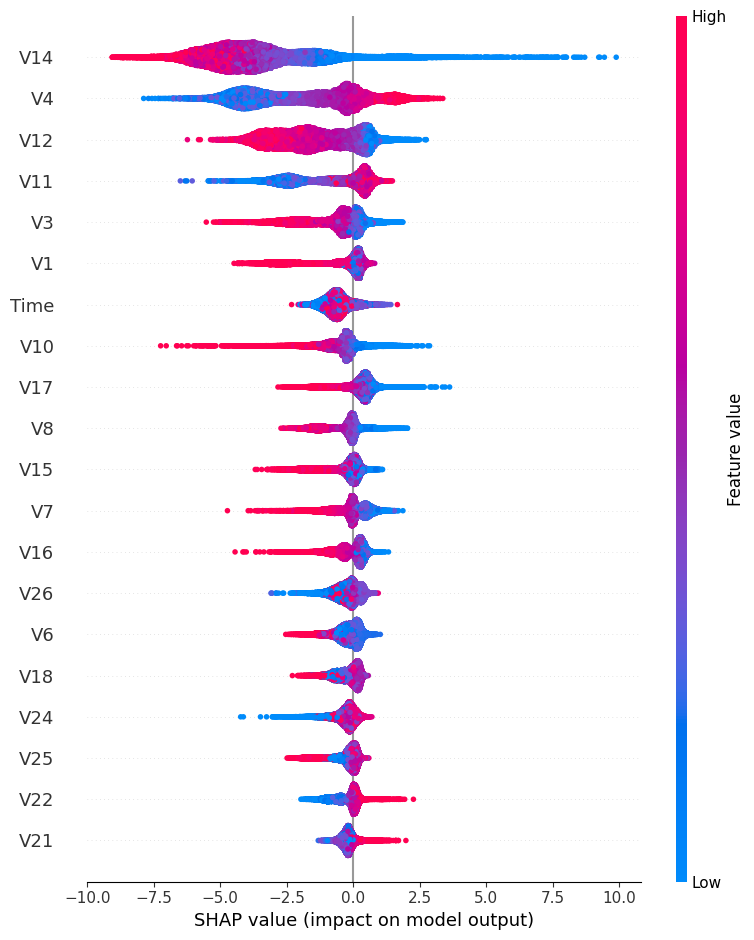

In [71]:
shap.summary_plot(shap_values, X_test)

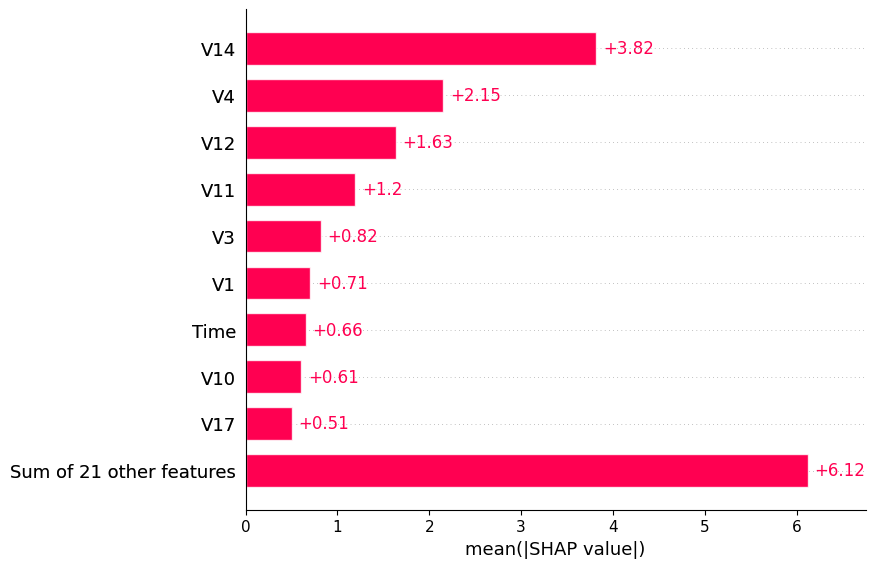

In [73]:
shap.plots.bar(shap_values)

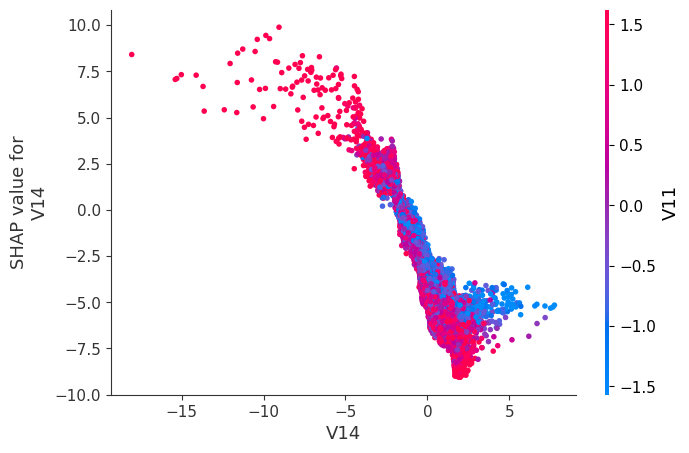

In [75]:
shap.dependence_plot("V14", shap_values.values, X_test)

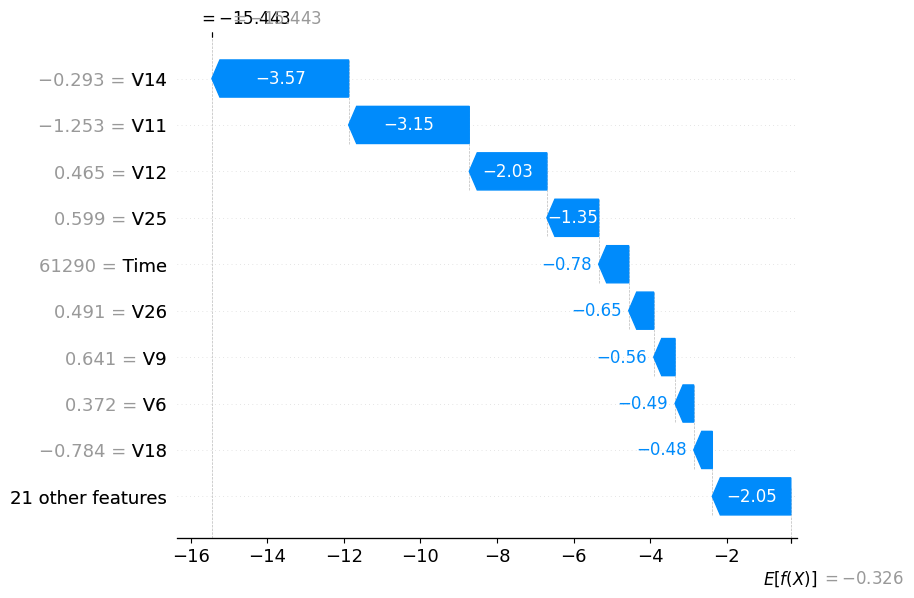

In [77]:
shap.plots.waterfall(shap_values[0])

In [78]:
plt.savefig('roc_curve.png')

<Figure size 640x480 with 0 Axes>

In [79]:
!git rm --cached creditcard.csv
!git commit -m "Removed large CSV file from tracking"
!git push origin master

fatal: pathspec 'creditcard.csv' did not match any files


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/Model-checkpoint.ipynb
	modified:   Model.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	creditcard.csv

no changes added to commit (use "git add" and/or "git commit -a")


remote: error: Trace: cd920787a7f7db474463b1885036d478bdcd950ca6d8bc2418bd83c33068bdd0        
remote: error: See https://gh.io/lfs for more information.        
remote: error: File creditcard.csv is 143.84 MB; this exceeds GitHub's file size limit of 100.00 MB        
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.        
To https://github.com/fayzkk889/CreditCardFraudDetection.git
 ! [remote rejected] master -> master (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/fayzkk889/CreditCardFraudDetection.git'
